# Calories & Workouts — Estimation exercises

This exercise uses the 'Life Style Data' dataset (original source: Kaggle) to estimate energy expenditure and compare activity patterns across workout types. The dataset is available as `Final_data.csv` in the repository and originates from:

https://www.kaggle.com/datasets/jockeroika/life-style-data/data

Each row is a respondent-day record and typically contains attributes such as respondent id, age, gender, workout type (e.g. running, cycling, strength training, walking), duration, METs or calories burned, weekly activity summaries, and self‑reported fitness / life‑satisfaction. Use the actual column names in `Final_data.csv` and adapt cleaning rules if they differ.

Story context

The public health team wants short, quantitative answers to guide messaging and targeted encouragement for physical activity. Focus your analysis on calories burned and differences between common workout types.

Core questions (short, evidence‑based answers expected):
- What is the typical number of calories burned per recorded workout (point estimate + 95% CI)?
- How do mean calories burned differ between two workout types you choose (e.g., running vs walking)? Provide a point estimate and a 95% interval for the difference.
- What proportion of recorded workouts meet a chosen intensity threshold (e.g., calories ≥ X or METs above guideline)? Provide point estimate and 95% CI (normal approx and Wilson).

Estimation tasks (implement and report results below):
1. Estimate the mean calories burned per workout with SE and a 95% confidence interval. State how you clean and filter the calories variable (units, unrealistic values).
2. Estimate the difference in mean calories burned between two workout categories (example: running vs walking). Use Welch's t‑interval and note any small‑sample caveats or unequal‑variance evidence.
3. Estimate a proportion and its CI: choose a binary rule (example: workouts ≥ 300 kcal or workouts with duration ≥ 30 min). Report both the normal approximation CI and the Wilson interval; briefly compare them.
4. For the mean and for the chosen proportion, compute required sample sizes to achieve margin of error = 25 kcal (for the mean) and margin of error = 0.05 (for the proportion). For the mean use the sample SD as a pilot; for the proportion show conservative p=0.5 and observed p̂.
5. Create two visualizations: a histogram (or density) of calories burned and a grouped bar/point plot with means ± 95% CIs by workout type (choose 3–4 common types). What about a boxplot with std. errors and CI as whiskers?

Data cleaning & reproducibility notes

- Verify and coerce the calories variable to numeric; remove or flag implausible values (e.g., negative calories or extremely large outliers).
- Standardize workout‑type labels (lowercase/strip) and collapse rare categories into 'other' if needed.
- Be explicit about row filtering (e.g., exclude missing calories, or restrict to workouts with recorded duration > 0).
- Document any assumptions (independence of records, whether rows represent unique persons or repeated measures) and adjust inference if necessary (e.g., treat repeated measures carefully).

Instructions

- Run the next code cell to load `Final_data.csv` into a pandas DataFrame named `df` and inspect column names and a few rows.
- Implement cleaning steps in an executable code cell (keep raw and cleaned columns visible).
- Place full solutions (cleaning + estimation code) in a separate script if you want to hide solutions from students; the notebook should contain loader and student prompt cells only.

Deliverables

- A short results block (Markdown) summarizing: point estimates, SEs, 95% CIs, and one‑line interpretations for each question.
- The cleaned data snippet and the exact code used for cleaning so results are reproducible.

Notes

- If the dataset contains repeated measurements per person, note this and prefer participant‑level aggregation for person-level inference unless you explicitly model within‑person correlation.
- Use a fixed random seed only if you perform random sampling or simulation steps.

Ready — run the loader cell next to begin.

(1273.149189830543, 1287.0700111694568)
4923
(1200.741510724302, 1222.3478494219505)


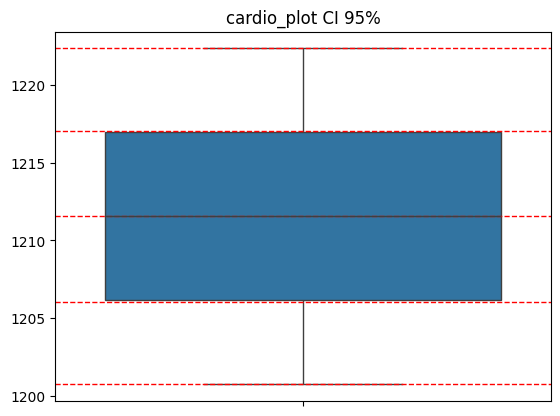

In [24]:
import pandas as pd
import scipy.stats as ss
from seaborn import boxplot
import matplotlib.pyplot as plt
url = ('https://raw.githubusercontent.com/kflisikowsky/analiza_danych_projekt_zespolowy/refs/heads/main/Life%20Style%20Data/Final_data.csv')
df = pd.read_csv(url)
mean = df['Calories_Burned'].mean()
sem = df['Calories_Burned'].sem(ddof=1)


CI = ss.norm.interval(0.95, loc=mean, scale=sem)
print(CI)

cardio = df[df['Workout_Type'] == 'Cardio']['Calories_Burned']
lenght = cardio.shape[0]
print(lenght)
mean_cardio = cardio.mean()
sem_cardio = cardio.sem(ddof=1)
CI_cardio = ss.norm.interval(0.95, loc=mean_cardio, scale=sem_cardio)
print(CI_cardio)


cardio_plot = boxplot(CI_cardio)
plt.title("cardio_plot CI 95%")
plt.axhline(y=mean_cardio+sem_cardio, color='red', linestyle='--', linewidth=1)
plt.axhline(y=mean_cardio-sem_cardio, color='red', linestyle='--', linewidth=1)
plt.axhline(y=mean_cardio, color='red', linestyle='--', linewidth=1)
plt.axhline(y=CI_cardio[0], color='red', linestyle='--', linewidth=1)
plt.axhline(y=CI_cardio[1], color='red', linestyle='--', linewidth=1)
plt.show()


